<a href="https://colab.research.google.com/github/LauraValbuena09/Alternaria/blob/main/EstadisticaLes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalar librerias**



In [ ]:
!pip install pingouin scikit-bio statsmodels scikit-posthocs
!pip install --force-reinstall statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 14.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
  Created wheel for scikit-bio: filename=scikit_bio-0.5.9-cp310-cp310-linux_x86_64.whl size=2469070 sha256=ac0812e58a5120bdb972b7a8624c7a3d950595fcbeeacc1158a0589339a1394f
  Stored in directory: /root/.cache/pip/wheels/77/72/2c/993efbb4d69a86bee422bc96e4e2f1ec9af7cc596a08bb86e1
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp310-cp310-linux_x86_64.whl s

Luego de correr el código anterior se debe ir al menú ubicado en la parte superior y hacer click en Entorno de ejecución-Reiniciar sesión con el fin de que las librerias instaladas en el código funcionen sin ningún error.

**Librerias a usar**

In [ ]:
#Librerias básicas de python-para bases de datos
import pandas as pd
import numpy as np

#Librerias para gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

#Librerias para algunas variables de estadística descriptiva (Kurtosis, mediana y moda)
from scipy.stats import kurtosis
import statistics

#Librerias para test estadísticos
from scipy.stats import kstest, levene
from sklearn.preprocessing import MinMaxScaler
import pingouin as pg
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.libqsturng import psturng
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from pingouin import friedman
from sklearn.metrics import cohen_kappa_score
from skbio.stats.distance import permanova
from scikit_posthocs import posthoc_dunn
import scikit_posthocs as sp

#Libreria para ignorar mensajes adicionales en los gráficos
import warnings
warnings.filterwarnings('ignore')

#Libreria para vincular google drive
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Subir base de datos**

En caso de modificar la base de datos original en el drive, este código debe volver a correrse para que se actualicen los datos

In [ ]:
#Si la base de datos sigue el formato columna-fila
tomate = pd.read_excel('/content/drive/MyDrive/Estadística/Tomate_ELSOLAR_corregido.xlsx') #Pegar ruta donde está el archivo de drive a analizar
tomate

,TRAT,BLOQUE,REP,P-A 0DDA,INCIDENCIA 0DDA %,SEVERIDAD 0DDA,P-A 4 DDA,INCIDENCIA 4 DDA %,SEVERIDAD 4 DDA,P-A 7DDA,INCIDENCIA 7DDA %,SEVERIDAD 7DDA
0,1,1,1,1,70,1,0,40,1,0,40,0
1,1,1,2,1,70,1,0,40,1,0,40,0
2,1,1,3,1,70,1,0,40,1,0,40,0
3,1,1,4,0,70,0,0,40,0,1,40,1
4,1,1,5,1,70,1,0,40,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,5,4,6,0,50,0,1,60,1,0,70,0
196,5,4,7,1,50,1,0,60,0,1,70,1
197,5,4,8,1,50,1,1,60,1,1,70,10
198,5,4,9,0,50,0,1,60,1,0,70,0


**Recordar:** En el formato fila-columna:
*   Solo hay una fila con nombres de columnas
*   No hay columnas/filas combinadas
*   No se deben incluir imágenes como logos

**Verificar datos nulos y ceros**

Este paso es importante debido a que las pruebas que vamos a realizar no funcionan si hay datos faltantes. Si por error de digitación o relacionado, hay datos faltantes (observados con coloración amarilla) lo ideal es revisar la base de datos original y corregir ese valor de ser posible.

Por su parte, la visualización de ceros es importante para validar si hay ceros reals o no. Por ejemplo: si en la columna 'TRAT' hay un valor 0, se debe corregir la base de datos ya que no hay ningún tratamiento con ese número. Por el contrario, si el 0 está en las columnas de presencia-ausencia, incidencia y/o severidad, estos corresponden a ceros reales, por lo que no se debe modificar la base de datos.

In [ ]:
px.imshow(tomate.isnull(),width=1000, height=500,title='Null Values- (Yellow)', labels=dict(x="Variables", y="Observations"))

In [ ]:
px.imshow(tomate==0,width=1000, height=500,title='Zeros Values- (Yellow)', labels=dict(x="Variables", y="Observations"))

**Visualización de variables**

Esto nos permitirá ver el comportamiento de las variables, además de verificar la presencia de posibles datos atípicos. En caso de observar datos muy altos que puedan ser debidos a errores de digitación, corregir la base de datos original

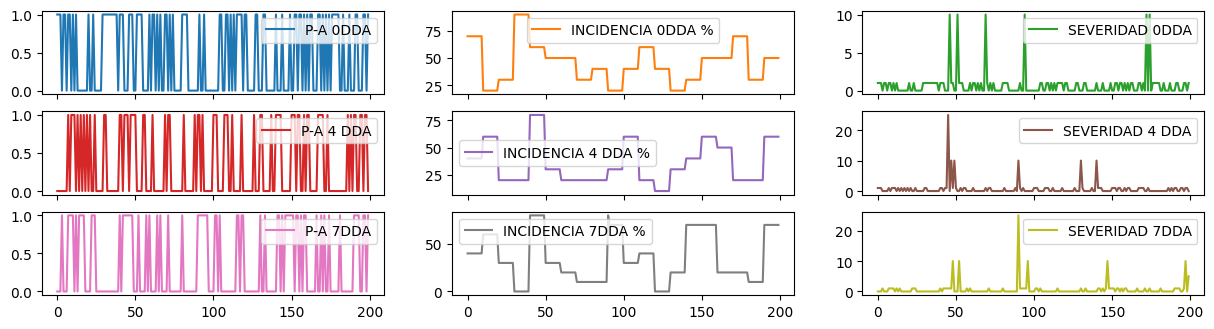

In [ ]:
ax = tomate[['P-A 0DDA', 'INCIDENCIA 0DDA %',
       'SEVERIDAD 0DDA', 'P-A 4 DDA', 'INCIDENCIA 4 DDA %', 'SEVERIDAD 4 DDA',
       'P-A 7DDA', 'INCIDENCIA 7DDA %', 'SEVERIDAD 7DDA']].plot(subplots=True, layout=(4,3), figsize=(15,5))
fig = plt.gcf()
plt.show()

Por su parte, los boxplot nos permitirán validar la presencia de datos atípicos (puntos blancos)

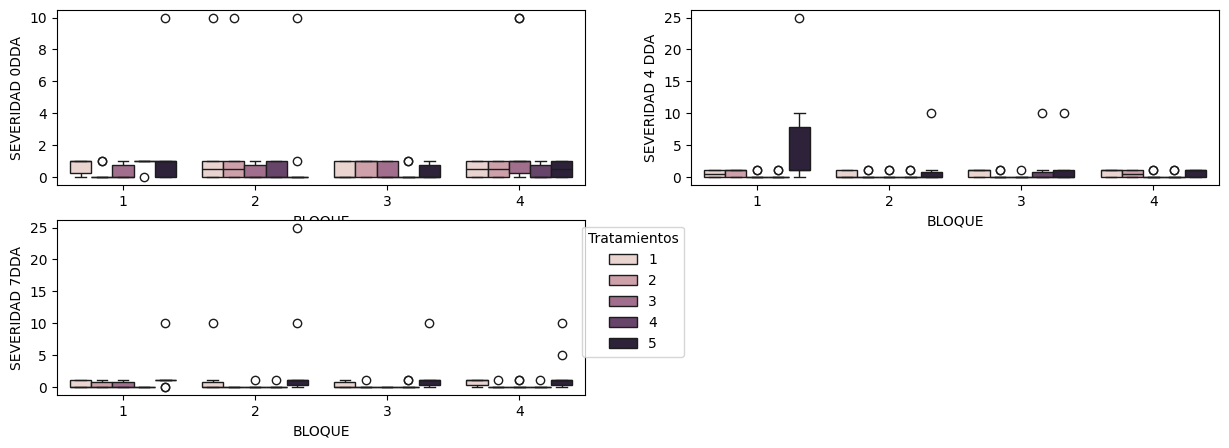

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.boxplot(x='BLOQUE',y='SEVERIDAD 0DDA', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,2)
sns.boxplot(x='BLOQUE',y='SEVERIDAD 4 DDA', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,3)
sns.boxplot(x='BLOQUE',y='SEVERIDAD 7DDA', data=tomate, hue='TRAT')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Tratamientos')

plt.show()

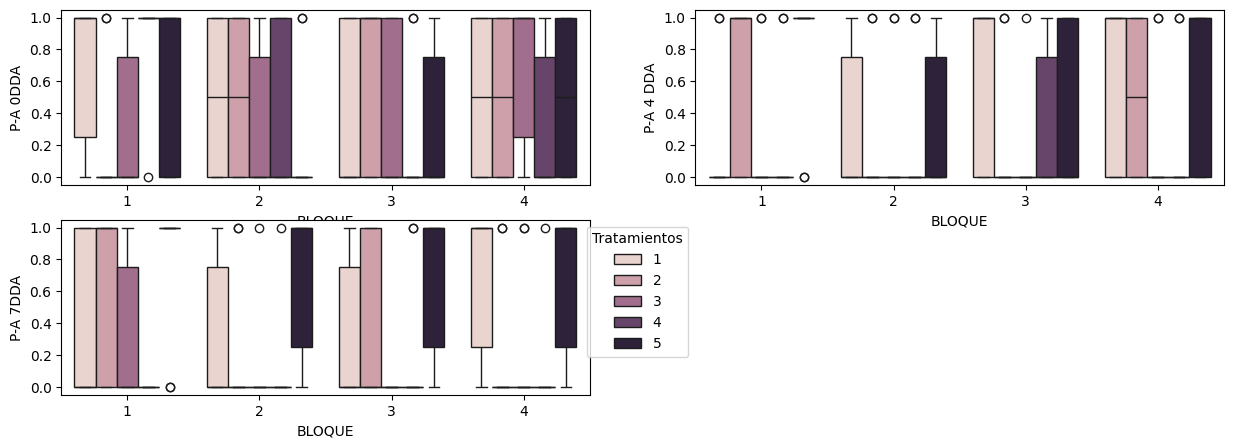

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.boxplot(x='BLOQUE',y='P-A 0DDA', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,2)
sns.boxplot(x='BLOQUE',y='P-A 4 DDA', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,3)
sns.boxplot(x='BLOQUE',y='P-A 7DDA', data=tomate, hue='TRAT')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Tratamientos')

plt.show()

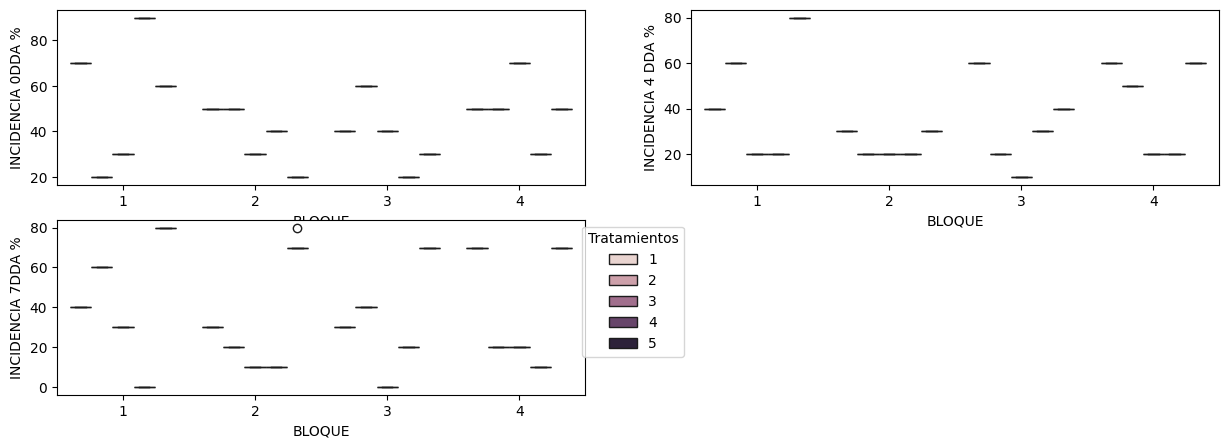

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.boxplot(x='BLOQUE',y='INCIDENCIA 0DDA %', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,2)
sns.boxplot(x='BLOQUE',y='INCIDENCIA 4 DDA %', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,3)
sns.boxplot(x='BLOQUE',y='INCIDENCIA 7DDA %', data=tomate, hue='TRAT')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Tratamientos')

plt.show()

En este caso se observan lineas rectas ya que no hay variación de los datos en cada bloque de los tratamientos. Por eso se presenta el siguiente gráfico donde se omiten los bloques

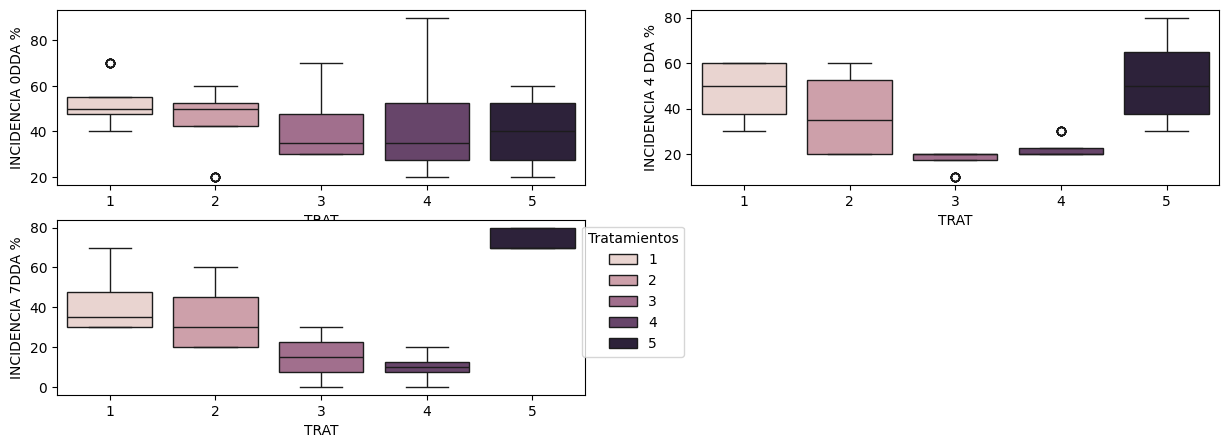

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(x='TRAT',y='INCIDENCIA 0DDA %', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,2)
sns.boxplot(x='TRAT',y='INCIDENCIA 4 DDA %', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,3)
sns.boxplot(x='TRAT',y='INCIDENCIA 7DDA %', data=tomate, hue='TRAT')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Tratamientos')
plt.show()

**Eliminar algunos datos atípicos**
(Si es necesario)

Si quieren eliminar datos iguales a algo poner !=, valores mayores o iguales a algo poner <, mayores a algo poner <=

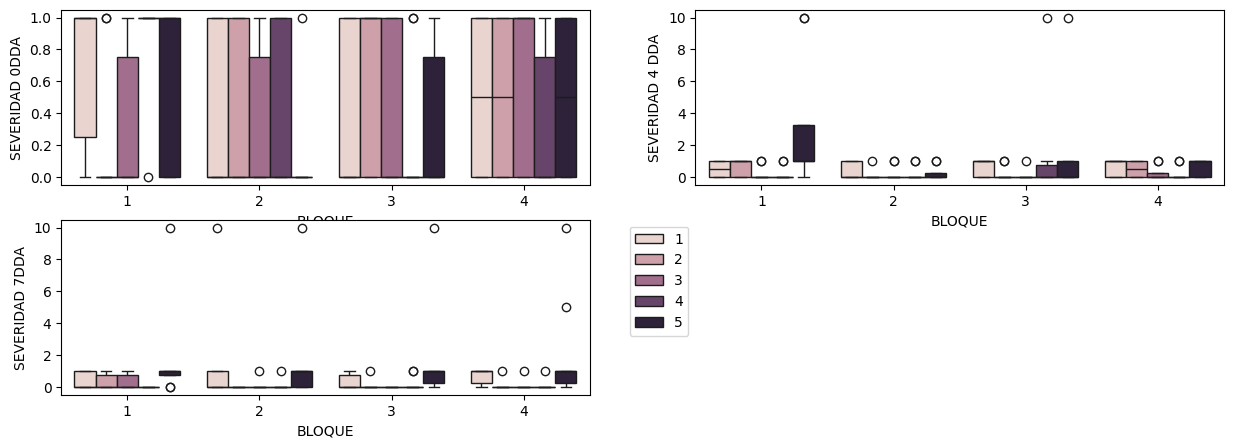

In [ ]:
tomate = tomate.loc[tomate['SEVERIDAD 0DDA']!=10].reset_index(drop=True) #estos valores se deben cuadrar dependiendo de los datos y el gráfico anterior.

tomate = tomate.loc[tomate['SEVERIDAD 4 DDA']!=25].reset_index(drop=True)

tomate = tomate.loc[tomate['SEVERIDAD 7DDA']!=25].reset_index(drop=True)

plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
sns.boxplot(x='BLOQUE',y='SEVERIDAD 0DDA', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,2)
sns.boxplot(x='BLOQUE',y='SEVERIDAD 4 DDA', data=tomate, hue='TRAT', legend=False)

plt.subplot(2,2,3)
sns.boxplot(x='BLOQUE',y='SEVERIDAD 7DDA', data=tomate, hue='TRAT')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

**Estadística descriptiva**

Se presentan tablas con la media, desviación estándar, valores mínimos, máximos, coeficiente de variación, rango intercuartil y la curtosis de cada variable para cada tratamiento y bloque

In [ ]:
def coef_var(x):
    return np.var(x) / np.mean(x) * 100

def ran_intercuartil(x):
    return np.percentile(x, 75) - np.percentile(x, 25)

def moda(x):
    return statistics.mode(x)

pd.set_option('display.max_columns', None) #para ver todas las columnas

tomate.groupby(['TRAT','BLOQUE'])[['P-A 0DDA',
       'SEVERIDAD 0DDA', 'P-A 4 DDA', #acá se ponen los nombres de las columnas a las que se le quiere sacar la estadística descriptiva
       'SEVERIDAD 4 DDA', 'P-A 7DDA','SEVERIDAD 7DDA']].agg(['mean', 'std', 'min', 'max', moda, coef_var, ran_intercuartil, kurtosis])

P-A 0DDA                                                     \
                 mean       std min max moda   coef_var ran_intercuartil   
TRAT BLOQUE                                                                
1    1       0.700000  0.483046   0   1    1  30.000000             0.75   
     2       0.444444  0.527046   0   1    0  55.555556             1.00   
     3       0.400000  0.516398   0   1    0  60.000000             1.00   
     4       0.500000  0.527046   0   1    0  50.000000             1.00   
2    1       0.200000  0.421637   0   1    0  80.000000             0.00   
     2       0.444444  0.527046   0   1    0  55.555556             1.00   
     3       0.600000  0.516398   0   1    1  40.000000             1.00   
     4       0.500000  0.527046   0   1    1  50.000000             1.00   
3    1       0.300000  0.483046   0   1    0  70.000000             0.75   
     2       0.300000  0.483046   0   1    0  70.000000             0.75   
     3       0.400000  0.516398   0   1    0  60.000000             1.00   
     4       0.625000  0.517549   0   1    1  37.500000             1.00   
4    1       0.900000  0.316228   0   1    1  10.000000             0.00   
     2       0.400000  0.516398   0   1    0  60.000000             1.00   
     3       0.200000  0.421637   0   1    0  80.000000             0.00   
     4       0.300000  0.483046   0   1    0  70.000000             0.75   
5    1       0.625000  0.517549   0   1    1  37.500000             1.00   
     2       0.125000  0.353553   0   1    0  87.500000             0.00   
     3       0.300000  0.483046   0   1    0  70.000000             0.75   
     4       0.500000  0.527046   0   1    0  50.000000             1.00   

                      SEVERIDAD 0DDA                                    \
             kurtosis           mean       std min max moda   coef_var   
TRAT BLOQUE                                                              
1    1      -1.238095       0.700000  0.483046   0   1    1  30.000000   
     2      -1.950000       0.444444  0.527046   0   1    0  55.555556   
     3      -1.833333       0.400000  0.516398   0   1    0  60.000000   
     4      -2.000000       0.500000  0.527046   0   1    0  50.000000   
2    1       0.250000       0.200000  0.421637   0   1    0  80.000000   
     2      -1.950000       0.444444  0.527046   0   1    0  55.555556   
     3      -1.833333       0.600000  0.516398   0   1    1  40.000000   
     4      -2.000000       0.500000  0.527046   0   1    1  50.000000   
3    1      -1.238095       0.300000  0.483046   0   1    0  70.000000   
     2      -1.238095       0.300000  0.483046   0   1    0  70.000000   
     3      -1.833333       0.400000  0.516398   0   1    0  60.000000   
     4      -1.733333       0.625000  0.517549   0   1    1  37.500000   
4    1       5.111111       0.900000  0.316228   0   1    1  10.000000   
     2      -1.833333       0.400000  0.516398   0   1    0  60.000000   
     3       0.250000       0.200000  0.421637   0   1    0  80.000000   
     4      -1.238095       0.300000  0.483046   0   1    0  70.000000   
5    1      -1.733333       0.625000  0.517549   0   1    1  37.500000   
     2       3.142857       0.125000  0.353553   0   1    0  87.500000   
     3      -1.238095       0.300000  0.483046   0   1    0  70.000000   
     4      -2.000000       0.500000  0.527046   0   1    0  50.000000   

                                       P-A 4 DDA                         \
            ran_intercuartil  kurtosis      mean       std min max moda   
TRAT BLOQUE                                                               
1    1                  0.75 -1.238095  0.200000  0.421637   0   1    0   
     2                  1.00 -1.950000  0.333333  0.500000   0   1    0   
     3                  1.00 -1.833333  0.600000  0.516398   0   1    1   
     4                  1.00 -2.000000  0.600000  0.516398   0   1    1   
2    1                  0.00  0.2500

La siguiente tabla es para las variables que se debieron agrupar por tratamiento ya que no mostraban variación dentro de los bloques

In [ ]:
tomate.groupby(['TRAT'])[['INCIDENCIA 0DDA %', 'INCIDENCIA 4 DDA %', 'INCIDENCIA 7DDA %']].agg(['mean', 'std', 'min', 'max', moda, coef_var, ran_intercuartil, kurtosis])

INCIDENCIA 0DDA %                                                        \
                  mean        std min max moda     coef_var ran_intercuartil   
TRAT                                                                           
1            52.564103  11.172793  40  70   50   231.394622             15.0   
2            44.871795  15.367737  20  60   50   512.820513             20.0   
3            41.052632  15.732472  30  70   30   587.044534             10.0   
4            45.000000  27.268842  20  90   90  1611.111111             25.0   
5            40.000000  15.491933  20  60   30   583.333333             20.0   

               INCIDENCIA 4 DDA %                                      \
      kurtosis               mean        std min max moda    coef_var   
TRAT                                                                    
1    -0.964812          47.948718  13.014059  30  60   60  344.165638   
2    -0.886957          37.948718  18.090342  20  60   20  840.263340   
3    -0.319580          17.368421   4.462583  10  20   20  111.642743   
4    -0.839477          22.500000   4.385290  20  30   20   83.333333   
5    -1.591837          52.222222  18.687064  30  80   40  650.118203   

                                INCIDENCIA 7DDA %                          \
     ran_intercuartil  kurtosis              mean        std min max moda   
TRAT                                                                        
1                20.0 -1.685740         42.820513  16.693635  30  70   30   
2                35.0 -1.853258         35.384615  16.834512  20  60   20   
3                 7.5 -0.842857         14.736842  11.563419   0  30   30   
4                 2.5 -0.666667         10.000000   7.161149   0  20   10   
5                20.0 -1.319405         72.222222   4.216370  70  80   70   

                                             
        coef_var ran_intercuartil  kurtosis  
TRAT                                         
1     634.116383             25.0 -0.923431  
2     780.379041             30.0 -1.405959  
3     883.458647             25.0 -1.407832  
4     500.000000              5.0 -1.000000  
5      23.931624              0.0 -0.214286

**Pruebas de normalidad y homocedasticidad**

Si se cumplen (p valor > 0.05) se pueden correr pruebas paramétricas. Si no se cumplen los criterios se deben correr pruebas no paramétricas. Más adelante se presentan algunos ejemplos.

In [ ]:
#Pruebas de normalidad Kolmogorov-Smirnov
for f in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  p_value = kstest(tomate[f], 'norm')[1]
  print(f" {f}: p-value = {p_value}")

 SEVERIDAD 0DDA: p-value = 6.543898403330272e-45
 SEVERIDAD 4 DDA: p-value = 6.543898403330272e-45
 SEVERIDAD 7DDA: p-value = 6.543898403330272e-45


In [ ]:
# Pruebas homocedasticidad
for f in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  p_value = levene(tomate['TRAT'],tomate[f])
  print(f" {f}: p-value = {p_value}")


 SEVERIDAD 0DDA: p-value = LeveneResult(statistic=136.59563250450694, pvalue=3.4594227640513715e-27)
 SEVERIDAD 4 DDA: p-value = LeveneResult(statistic=29.317685135395628, pvalue=1.0881997333145908e-07)
 SEVERIDAD 7DDA: p-value = LeveneResult(statistic=24.53439374446542, pvalue=1.098227915919809e-06)


**Normalización**

Si las variables no cumplen normalidad, se pueden intentar normalizar para correr pruebas no paramétricas. Se presentan 3 ejemplos:

In [ ]:
#normalizar raiz cuadrada y prueba de normalidad

tomate_norm= pd.concat([tomate[['TRAT','BLOQUE']],tomate.transform(lambda x: x**0.5)], axis=1)

for f in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  p_value = kstest(tomate_norm[f], 'norm')[1]
  print(f" {f}: p-value = {p_value}")

 SEVERIDAD 0DDA: p-value = 6.543898403330272e-45
 SEVERIDAD 4 DDA: p-value = 6.543898403330272e-45
 SEVERIDAD 7DDA: p-value = 6.543898403330272e-45


In [ ]:
#normalización logaritmo natural y prueba de normalidad

tomate_norm= pd.concat([tomate[['TRAT','BLOQUE']],tomate.transform(lambda x: np.log(x+1))], axis=1)

for f in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  p_value = kstest(tomate_norm[f], 'norm')[1]
  print(f" {f}: p-value = {p_value}")

 SEVERIDAD 0DDA: p-value = 6.543898403330272e-45
 SEVERIDAD 4 DDA: p-value = 6.543898403330272e-45
 SEVERIDAD 7DDA: p-value = 6.543898403330272e-45


In [ ]:
#normalización (valor - media)/std y prueba de normalidad

nor = tomate.groupby(['TRAT','BLOQUE']).transform(lambda x: ((x - x.mean()+1) / x.std()))
nor = nor[['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']]
tomate_norm= pd.concat([tomate[['TRAT','BLOQUE']],nor], axis=1)

for f in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  p_value = kstest(tomate_norm[f], 'norm')[1]
  print(f" {f}: p-value = {p_value}")

 SEVERIDAD 0DDA: p-value = 2.1850902174229923e-114
 SEVERIDAD 4 DDA: p-value = 6.750075433882473e-83
 SEVERIDAD 7DDA: p-value = 6.90084105839134e-86


**Pruebas paramétricas**

En caso de que los datos origiunales o los datos después de normalizar cumplan con los criterios de normalidad y homocedasticidad se corren pruebas paramétricas: ANOVAS o MANOVAS. Estos últimos son ANOVAS múltiples

**Nota:** En estre caso se hacen los ANOVAS incumpliendo los principios de normalidad y homocedasticidad **SOLO** con el objetivo de realizar un ejemplo del código

**Tabla ANOVAS:**

SS = suma de cuadrados

DF = grados de libertad

MS = cuadrados medios

F = valor f

p-unc = p-valor

np2 = ETA cuadrado (Prueba peso de las variables)

**Metricas del ANOVA**

Adicionalmente, se presentan métricas como el R-cuadrado, coeficiente de variación, MSE, valor crítico del rango estudentizado y la diferencia significativa mínima

In [ ]:
anova = pg.anova(data=tomate, dv='SEVERIDAD 0DDA', between=['TRAT', 'BLOQUE'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,TRAT,0.359583,4.0,0.089896,0.379256,0.823249,0.008743
1,BLOQUE,1.116803,3.0,0.372268,1.570540,0.198313,0.026663
2,TRAT * BLOQUE,4.981589,12.0,0.415132,1.751380,0.059965,0.108885
3,Residual,40.769444,172.0,0.237032,NaN,NaN,NaN


In [ ]:
ss_total = anova.SS.sum()
ss_residual = anova.SS[3]
ss_modelo = ss_total - ss_residual

r_cuadrado = ss_modelo / ss_total
r_cuadrado

mse = ss_residual / anova.DF[3]

sd_and_means = tomate.groupby(['TRAT', 'BLOQUE'])['SEVERIDAD 0DDA'].agg(['mean','std']).reset_index()
cof_var = ((sd_and_means['std'] / sd_and_means['mean']).mean())*100

val_cri = stats.t.ppf(1 - 0.025, df=anova.DF[0])

se_diff = ((anova.SS[0] / anova.DF[0] )/ len(tomate['TRAT'].unique()) +
           (anova.SS[1] / anova.DF[1] )/ len(tomate['BLOQUE'].unique())) ** 0.5
dif_sig_min = val_cri * se_diff

met_anova = pd.DataFrame({
    'R_cuadrado' : [r_cuadrado],
    'MSE' : [mse],
    'Coef. variación' : [cof_var],
    'Val. crítico rango estud.' : [val_cri],
    'Dif. significativa min.' : [dif_sig_min]
})
met_anova

,R_cuadrado,MSE,Coef. variación,Val. crítico rango estud.,Dif. significativa min.
0,0.136742,0.237032,132.253143,2.776445,0.925211


In [ ]:
anova = pg.anova(data=tomate, dv='SEVERIDAD 4 DDA', between=['TRAT', 'BLOQUE'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,TRAT,26.274232,4.0,6.568558,3.405182,0.010412,0.073379
1,BLOQUE,10.044916,3.0,3.348305,1.735782,0.161488,0.029386
2,TRAT * BLOQUE,39.668388,12.0,3.305699,1.713695,0.067454,0.106792
3,Residual,331.786111,172.0,1.928989,NaN,NaN,NaN


In [ ]:
ss_total = anova.SS.sum()
ss_residual = anova.SS[3]
ss_modelo = ss_total - ss_residual

r_cuadrado = ss_modelo / ss_total
r_cuadrado

mse = ss_residual / anova.DF[3]

sd_and_means = tomate.groupby(['TRAT', 'BLOQUE'])['SEVERIDAD 0DDA'].agg(['mean','std']).reset_index()
cof_var = ((sd_and_means['std'] / sd_and_means['mean']).mean())*100

val_cri = stats.t.ppf(1 - 0.025, df=anova.DF[0])

se_diff = ((anova.SS[0] / anova.DF[0] )/ len(tomate['TRAT'].unique()) +
           (anova.SS[1] / anova.DF[1] )/ len(tomate['BLOQUE'].unique())) ** 0.5
dif_sig_min = val_cri * se_diff

met_anova = pd.DataFrame({
    'R_cuadrado' : [r_cuadrado],
    'MSE' : [mse],
    'Coef. variación' : [cof_var],
    'Val. crítico rango estud.' : [val_cri],
    'Dif. significativa min.' : [dif_sig_min]
})
met_anova

,R_cuadrado,MSE,Coef. variación,Val. crítico rango estud.,Dif. significativa min.
0,0.186347,1.928989,132.253143,2.776445,4.071814


In [ ]:
anova = pg.anova(data=tomate, dv='SEVERIDAD 7DDA', between=['TRAT', 'BLOQUE'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,TRAT,79.141752,4.0,19.785438,7.904065,0.000007,0.155274
1,BLOQUE,1.242699,3.0,0.414233,0.165481,0.919513,0.002878
2,TRAT * BLOQUE,6.813937,12.0,0.567828,0.226841,0.996915,0.015580
3,Residual,430.550000,172.0,2.503198,NaN,NaN,NaN


In [ ]:
ss_total = anova.SS.sum()
ss_residual = anova.SS[3]
ss_modelo = ss_total - ss_residual

r_cuadrado = ss_modelo / ss_total
r_cuadrado

mse = ss_residual / anova.DF[3]

sd_and_means = tomate.groupby(['TRAT', 'BLOQUE'])['SEVERIDAD 0DDA'].agg(['mean','std']).reset_index()
cof_var = ((sd_and_means['std'] / sd_and_means['mean']).mean())*100

val_cri = stats.t.ppf(1 - 0.025, df=anova.DF[0])

se_diff = ((anova.SS[0] / anova.DF[0] )/ len(tomate['TRAT'].unique()) +
           (anova.SS[1] / anova.DF[1] )/ len(tomate['BLOQUE'].unique())) ** 0.5
dif_sig_min = val_cri * se_diff

met_anova = pd.DataFrame({
    'R_cuadrado' : [r_cuadrado],
    'MSE' : [mse],
    'Coef. variación' : [cof_var],
    'Val. crítico rango estud.' : [val_cri],
    'Dif. significativa min.' : [dif_sig_min]
})
met_anova

,R_cuadrado,MSE,Coef. variación,Val. crítico rango estud.,Dif. significativa min.
0,0.168418,2.503198,132.253143,2.776445,5.594827


MANOVA (ANOVA multiple)

**Nota:** Los nombres de ñas columnas no pueden tener espacios, por lo que con el código data.columns = ['','',''] cambiamos los nombres

In [ ]:
data = tomate[['TRAT', 'BLOQUE', 'SEVERIDAD 0DDA', 'SEVERIDAD 4 DDA', 'SEVERIDAD 7DDA']]
data.columns = ['TRAT', 'BLOQUE', 'SEVERIDAD0DDA', 'SEVERIDAD4DDA','SEVERIDAD7DDA']

manov = MANOVA.from_formula('SEVERIDAD0DDA + SEVERIDAD4DDA + SEVERIDAD7DDA ~ TRAT + BLOQUE', data=data)
print(manov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8901 3.0000 187.0000  7.6962 0.0001
         Pillai's trace 0.1099 3.0000 187.0000  7.6962 0.0001
 Hotelling-Lawley trace 0.1235 3.0000 187.0000  7.6962 0.0001
    Roy's greatest root 0.1235 3.0000 187.0000  7.6962 0.0001
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          TRAT          Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9404 3.0000 187.0000  3.9483 0.0092
         Pillai's trace 0.0596 3.0000 187.0000  3.9483 0.0092
 Hotelling-Lawley trace 0.

**Diferencia de medias- Prueba poshoc**

Después del ANOVA

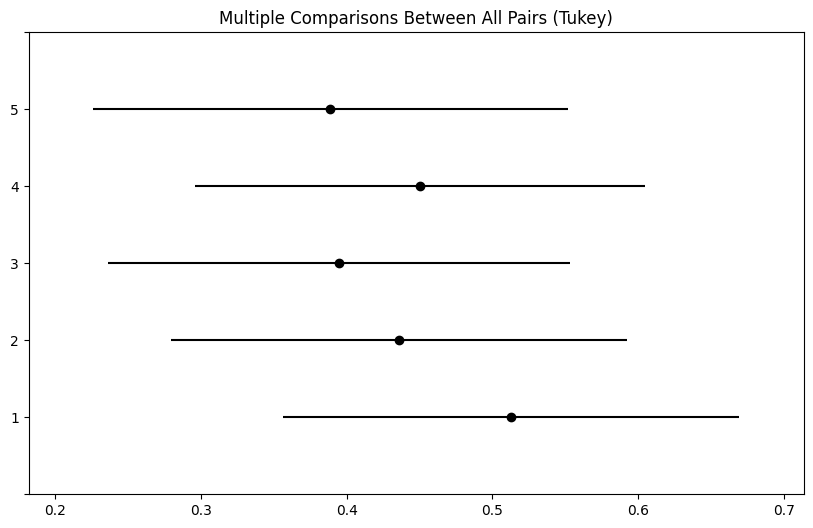

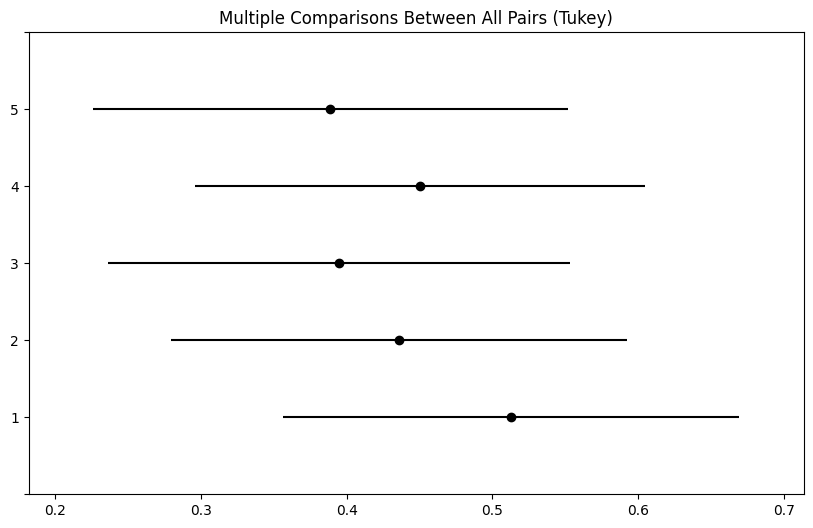

In [ ]:
tukey = pairwise_tukeyhsd(tomate['SEVERIDAD 0DDA'], tomate['TRAT'], alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.0769,0.9609,-0.3892,0.2354,False
1,3,-0.1181,0.8389,-0.4324,0.1963,False
1,4,-0.0628,0.9809,-0.3731,0.2475,False
1,5,-0.1239,0.8212,-0.4427,0.1948,False
2,3,-0.0412,0.9964,-0.3555,0.2732,False
2,4,0.0141,0.9999,-0.2962,0.3244,False
2,5,-0.047,0.9942,-0.3657,0.2717,False
3,4,0.0553,0.9885,-0.2571,0.3677,False
3,5,-0.0058,1.0,-0.3266,0.3149,False
4,5,-0.0611,0.984,-0.3779,0.2557,False


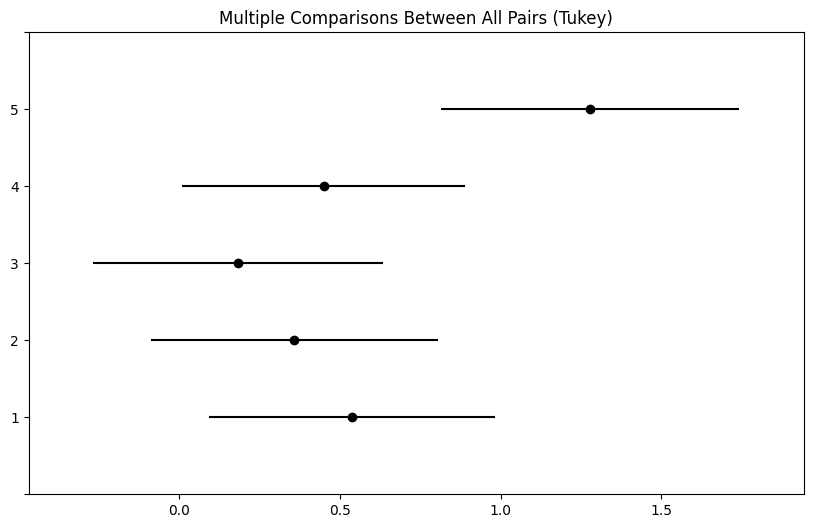

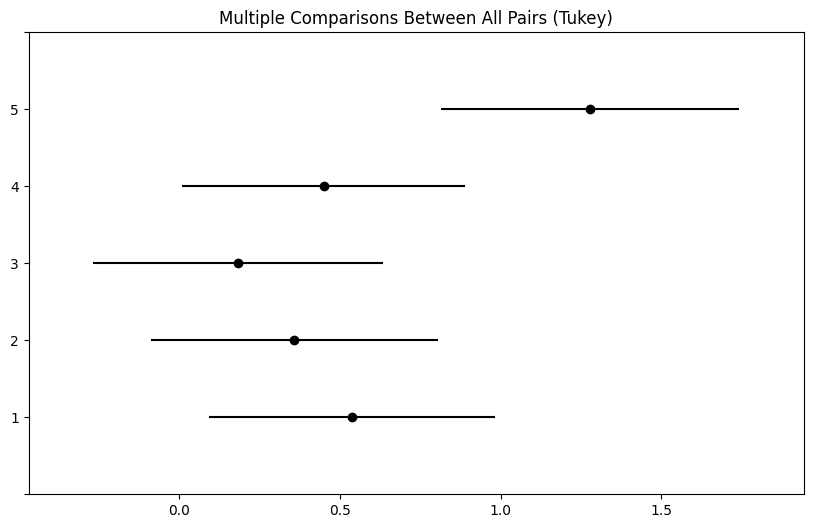

In [ ]:
tukey = pairwise_tukeyhsd(tomate['SEVERIDAD 4 DDA'], tomate['TRAT'], alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.1795,0.9812,-1.0705,0.7115,False
1,3,-0.3543,0.8125,-1.2511,0.5426,False
1,4,-0.0885,0.9987,-0.9738,0.7969,False
1,5,0.7393,0.1699,-0.17,1.6487,False
2,3,-0.1748,0.9834,-1.0716,0.7221,False
2,4,0.091,0.9986,-0.7944,0.9764,False
2,5,0.9188,0.0463,0.0095,1.8281,True
3,4,0.2658,0.9237,-0.6255,1.1571,False
3,5,1.0936,0.0103,0.1785,2.0086,True
4,5,0.8278,0.09,-0.0761,1.7316,False


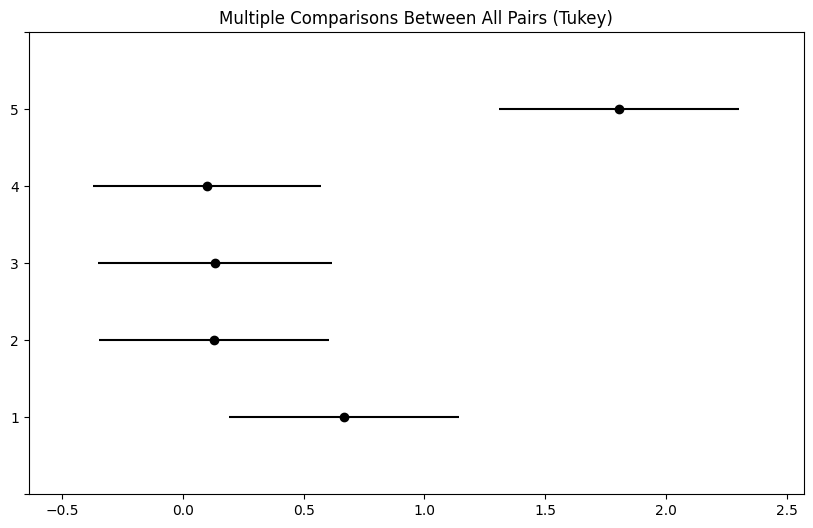

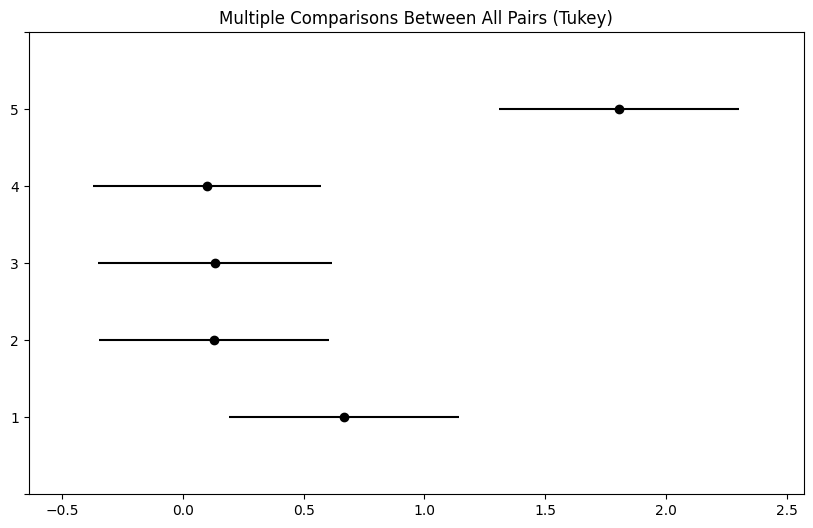

In [ ]:
tukey = pairwise_tukeyhsd(tomate['SEVERIDAD 7DDA'], tomate['TRAT'], alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.5385,0.5297,-1.4938,0.4169,False
1,3,-0.5351,0.5425,-1.4967,0.4265,False
1,4,-0.5667,0.4712,-1.516,0.3827,False
1,5,1.1389,0.0131,0.1639,2.1139,True
2,3,0.0034,1.0,-0.9582,0.965,False
2,4,-0.0282,1.0,-0.9775,0.9211,False
2,5,1.6774,0.0,0.7023,2.6524,True
3,4,-0.0316,1.0,-0.9872,0.9241,False
3,5,1.674,0.0,0.6928,2.6551,True
4,5,1.7056,0.0,0.7364,2.6747,True


**Pruebas no paramétricas**

Se corren en caso de que no se cumplan normalidad y homocedasticidad. Se presentan diferentes pruebas

**Kruskal-wallis**

In [ ]:
tomate_k = tomate
for d in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  tomate_k['GROUP'] = tomate_k["TRAT"].map(str) + "-" + tomate_k["BLOQUE"].map(str)
  kw = stats.kruskal(*[tomate[tomate['GROUP'] == g][d] for g in tomate['GROUP'].unique()])
  print(f'{d}: {kw}')

SEVERIDAD 0DDA: KruskalResult(statistic=26.19653145208697, pvalue=0.124805335010225)
SEVERIDAD 4 DDA: KruskalResult(statistic=35.488763073393386, pvalue=0.012188535413222455)
SEVERIDAD 7DDA: KruskalResult(statistic=60.81070335243939, pvalue=2.8784102448132416e-06)


**Friedman**

W = Coeficiente de concordancia de Kendall

ddof1 = Grados de libertad

Q = Estadística de Friedman Chi-cuadrado

p-unc = P-valor

In [ ]:
for d in ['SEVERIDAD 0DDA','SEVERIDAD 4 DDA','SEVERIDAD 7DDA']:
  f = friedman(data=tomate, dv=d, within='TRAT', subject='BLOQUE')
  print(f'{d}')
  print(f'{f}')

SEVERIDAD 0DDA
         Source         W  ddof1         Q    p-unc
Friedman   TRAT  0.165541      4  2.648649  0.61823
SEVERIDAD 4 DDA
         Source         W  ddof1        Q     p-unc
Friedman   TRAT  0.600649      4  9.61039  0.047528
SEVERIDAD 7DDA
         Source         W  ddof1          Q     p-unc
Friedman   TRAT  0.844156      4  13.506494  0.009049


**PERMANONA**

Otra prueba no paramétrica que se basa en permutaciones. Luego de permutar, se corren pruebas ANOVA

In [ ]:
tomate_per = tomate
for _ in range(1500): #Este valor se puede cambiar dependiendo de la cantidad de permutaciones que se vayan a hacer
    result = tomate_per.groupby(['TRAT', 'BLOQUE'])[['P-A 0DDA', 'INCIDENCIA 0DDA %',
       'SEVERIDAD 0DDA', 'P-A 4 DDA', 'INCIDENCIA 4 DDA %', 'SEVERIDAD 4 DDA',
       'P-A 7DDA', 'INCIDENCIA 7DDA %', 'SEVERIDAD 7DDA']].apply(lambda x: (x.mean() + x.std())).reset_index()
    tomate_per = pd.concat([tomate_per,result])

In [ ]:
anova = pg.anova(data=tomate_per, dv='SEVERIDAD 0DDA', between=['TRAT', 'BLOQUE'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,TRAT,703.109866,4.0,175.777467,823.454559,0.0,0.098423
1,BLOQUE,440.672533,3.0,146.890844,688.131066,0.0,0.064039
2,TRAT * BLOQUE,2560.897644,12.0,213.408137,999.740791,0.0,0.284496
3,Residual,6440.619778,30172.0,0.213463,NaN,NaN,NaN


In [ ]:
ss_total = anova.SS.sum()
ss_residual = anova.SS[3]
ss_modelo = ss_total - ss_residual

r_cuadrado = ss_modelo / ss_total
r_cuadrado

mse = ss_residual / anova.DF[3]

sd_and_means = tomate.groupby(['TRAT', 'BLOQUE'])['SEVERIDAD 0DDA'].agg(['mean','std']).reset_index()
cof_var = ((sd_and_means['std'] / sd_and_means['mean']).mean())*100

val_cri = stats.t.ppf(1 - 0.025, df=anova.DF[0])

se_diff = ((anova.SS[0] / anova.DF[0] )/ len(tomate['TRAT'].unique()) +
           (anova.SS[1] / anova.DF[1] )/ len(tomate['BLOQUE'].unique())) ** 0.5
dif_sig_min = val_cri * se_diff

met_anova = pd.DataFrame({
    'R_cuadrado' : [r_cuadrado],
    'MSE' : [mse],
    'Coef. variación' : [cof_var],
    'Val. crítico rango estud.' : [val_cri],
    'Dif. significativa min.' : [dif_sig_min]
})
met_anova

,R_cuadrado,MSE,Coef. variación,Val. crítico rango estud.,Dif. significativa min.
0,0.365162,0.213463,132.253143,2.776445,23.538983


In [ ]:
anova = pg.anova(data=tomate_per, dv='SEVERIDAD 4 DDA', between=['TRAT', 'BLOQUE'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,TRAT,362945.012566,4.0,90736.253142,49431.828575,0.0,0.867608
1,BLOQUE,178032.334761,3.0,59344.111587,32329.833439,0.0,0.762727
2,TRAT * BLOQUE,541794.009693,12.0,45149.500808,24596.810061,0.0,0.907258
3,Residual,55383.227947,30172.0,1.835584,NaN,NaN,NaN


In [ ]:
ss_total = anova.SS.sum()
ss_residual = anova.SS[3]
ss_modelo = ss_total - ss_residual

r_cuadrado = ss_modelo / ss_total
r_cuadrado

mse = ss_residual / anova.DF[3]

sd_and_means = tomate.groupby(['TRAT', 'BLOQUE'])['SEVERIDAD 0DDA'].agg(['mean','std']).reset_index()
cof_var = ((sd_and_means['std'] / sd_and_means['mean']).mean())*100

val_cri = stats.t.ppf(1 - 0.025, df=anova.DF[0])

se_diff = ((anova.SS[0] / anova.DF[0] )/ len(tomate['TRAT'].unique()) +
           (anova.SS[1] / anova.DF[1] )/ len(tomate['BLOQUE'].unique())) ** 0.5
dif_sig_min = val_cri * se_diff

met_anova = pd.DataFrame({
    'R_cuadrado' : [r_cuadrado],
    'MSE' : [mse],
    'Coef. variación' : [cof_var],
    'Val. crítico rango estud.' : [val_cri],
    'Dif. significativa min.' : [dif_sig_min]
})
met_anova

,R_cuadrado,MSE,Coef. variación,Val. crítico rango estud.,Dif. significativa min.
0,0.951339,1.835584,132.253143,2.776445,504.2385


In [ ]:
anova = pg.anova(data=tomate_per, dv='SEVERIDAD 7DDA', between=['TRAT', 'BLOQUE'])
anova

,Source,SS,DF,MS,F,p-unc,np2
0,TRAT,1.153635e+06,4.0,288408.658575,119485.311764,0.0,0.940620
1,BLOQUE,4.819429e+04,3.0,16064.764104,6655.498337,0.0,0.398227
2,TRAT * BLOQUE,2.073388e+05,12.0,17278.232214,7158.228096,0.0,0.740055
3,Residual,7.282791e+04,30172.0,2.413758,NaN,NaN,NaN


In [ ]:
ss_total = anova.SS.sum()
ss_residual = anova.SS[3]
ss_modelo = ss_total - ss_residual

r_cuadrado = ss_modelo / ss_total
r_cuadrado

mse = ss_residual / anova.DF[3]

sd_and_means = tomate.groupby(['TRAT', 'BLOQUE'])['SEVERIDAD 0DDA'].agg(['mean','std']).reset_index()
cof_var = ((sd_and_means['std'] / sd_and_means['mean']).mean())*100

val_cri = stats.t.ppf(1 - 0.025, df=anova.DF[0])

se_diff = ((anova.SS[0] / anova.DF[0] )/ len(tomate['TRAT'].unique()) +
           (anova.SS[1] / anova.DF[1] )/ len(tomate['BLOQUE'].unique())) ** 0.5
dif_sig_min = val_cri * se_diff

met_anova = pd.DataFrame({
    'R_cuadrado' : [r_cuadrado],
    'MSE' : [mse],
    'Coef. variación' : [cof_var],
    'Val. crítico rango estud.' : [val_cri],
    'Dif. significativa min.' : [dif_sig_min]
})
met_anova

,R_cuadrado,MSE,Coef. variación,Val. crítico rango estud.,Dif. significativa min.
0,0.950858,2.413758,132.253143,2.776445,689.643048


**Prueba poshoc**

Después del PERMANOVA se pueden correr diferencia de medias

**Tukey HSD**

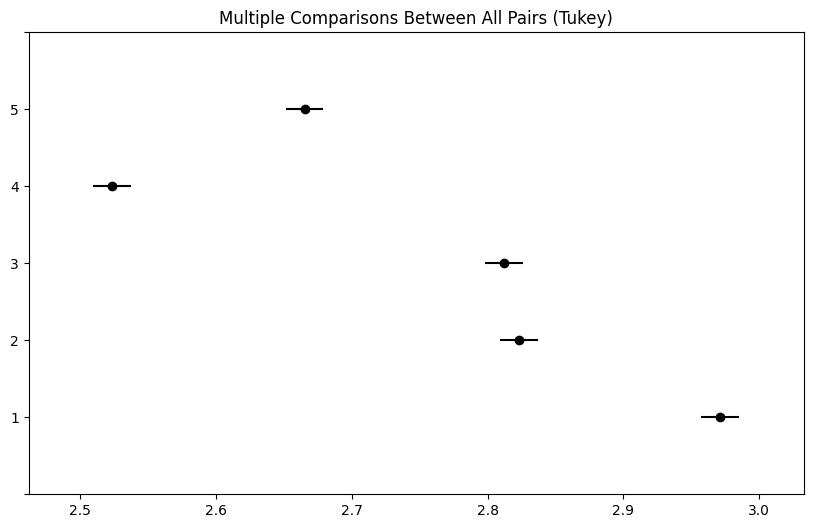

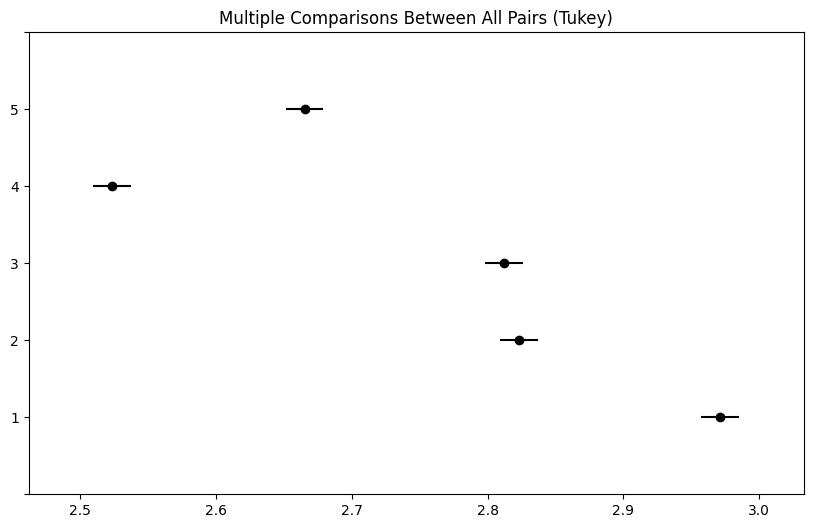

In [ ]:
tukey = pairwise_tukeyhsd(tomate_per['SEVERIDAD 0DDA'], tomate_per['TRAT'], alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.1483,0.0,-0.1761,-0.1205,True
1,3,-0.1591,0.0,-0.1868,-0.1313,True
1,4,-0.4481,0.0,-0.4758,-0.4203,True
1,5,-0.3062,0.0,-0.334,-0.2784,True
2,3,-0.0108,0.8286,-0.0385,0.017,False
2,4,-0.2998,0.0,-0.3275,-0.272,True
2,5,-0.1579,0.0,-0.1857,-0.1301,True
3,4,-0.289,0.0,-0.3168,-0.2613,True
3,5,-0.1471,0.0,-0.1749,-0.1194,True
4,5,0.1419,0.0,0.1141,0.1696,True


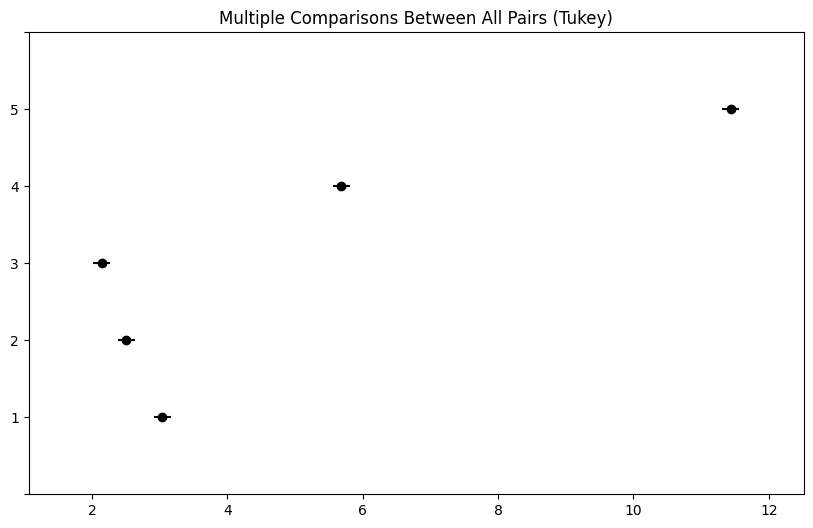

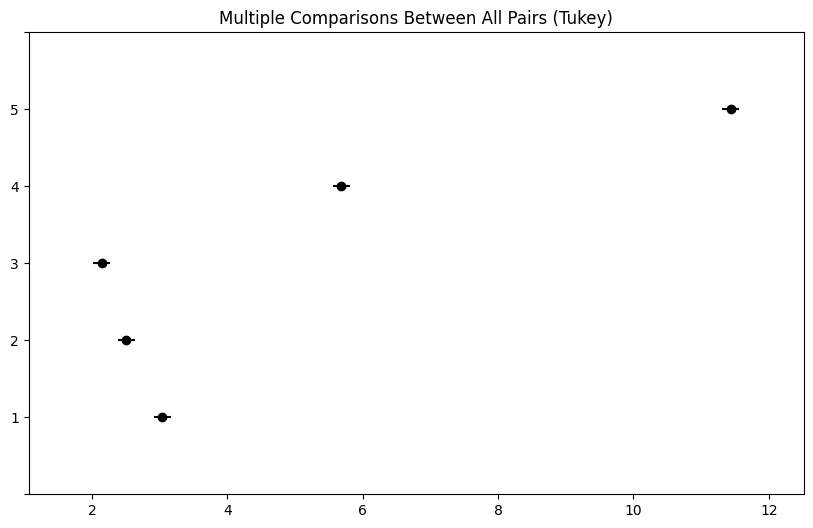

In [ ]:
tukey = pairwise_tukeyhsd(tomate_per['SEVERIDAD 4 DDA'], tomate_per['TRAT'], alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.531,0.0,-0.7826,-0.2794,True
1,3,-0.8953,0.0,-1.1469,-0.6438,True
1,4,2.6466,0.0,2.395,2.8981,True
1,5,8.3984,0.0,8.1468,8.65,True
2,3,-0.3643,0.0007,-0.6159,-0.1128,True
2,4,3.1776,0.0,2.926,3.4291,True
2,5,8.9294,0.0,8.6778,9.181,True
3,4,3.5419,0.0,3.2903,3.7935,True
3,5,9.2937,0.0,9.0421,9.5453,True
4,5,5.7518,0.0,5.5002,6.0034,True


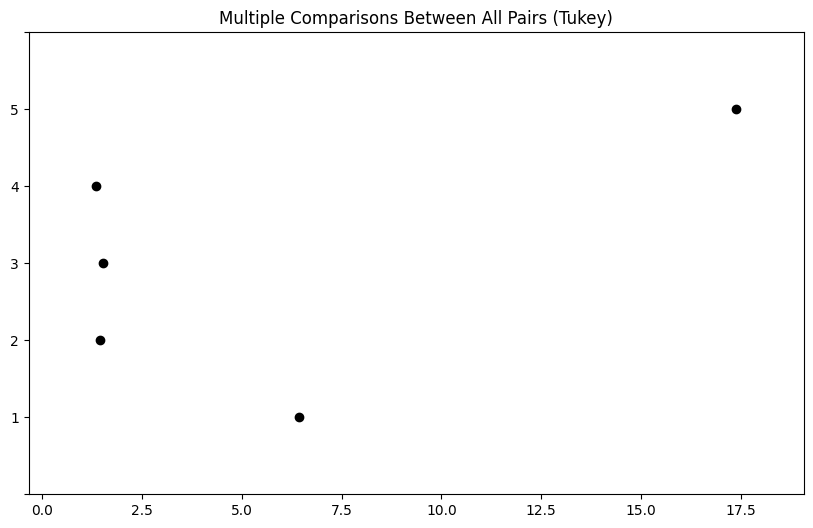

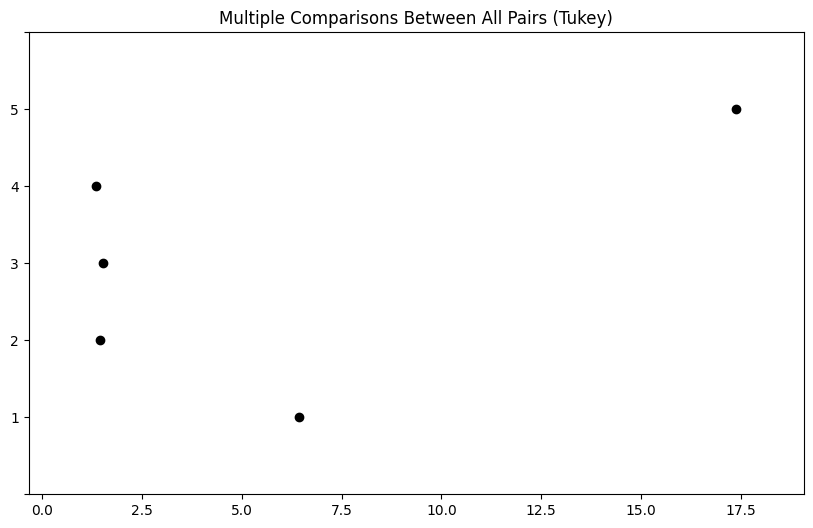

In [ ]:
tukey = pairwise_tukeyhsd(tomate_per['SEVERIDAD 7DDA'], tomate_per['TRAT'], alpha=0.05)
tukey.plot_simultaneous()

In [ ]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-4.9668,0.0,-5.1305,-4.803,True
1,3,-4.9031,0.0,-5.0669,-4.7394,True
1,4,-5.0653,0.0,-5.229,-4.9016,True
1,5,10.9497,0.0,10.786,11.1135,True
2,3,0.0637,0.8268,-0.1001,0.2274,False
2,4,-0.0985,0.4706,-0.2623,0.0652,False
2,5,15.9165,0.0,15.7527,16.0802,True
3,4,-0.1622,0.0537,-0.3259,0.0016,False
3,5,15.8528,0.0,15.6891,16.0166,True
4,5,16.015,0.0,15.8513,16.1788,True


Para las otras pruebas no paramétricas, se corren otro tipo de pruebas poshoc no paramétricas

**Dunn test**

En p_adjust= se puede usar bonferroni, hommel, holm-sidak,holm,simes-hochberg. Equivale al método de ajuste del p-valor

Valores de p-valoe < 0.05 significa que no hay diferencias significativas

<Axes: >

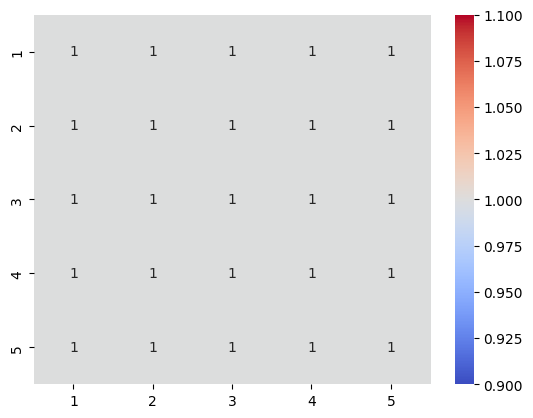

In [ ]:
dunn = sp.posthoc_dunn(tomate,val_col='SEVERIDAD 0DDA', group_col='TRAT',p_adjust='bonferroni')
sns.heatmap(dunn, annot=True, cmap='coolwarm')

<Axes: >

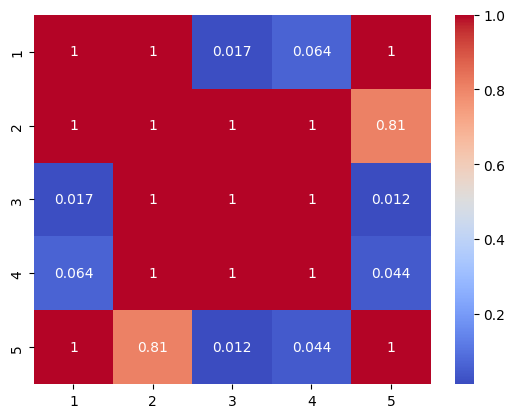

In [ ]:
dunn = sp.posthoc_dunn(tomate,val_col='SEVERIDAD 4 DDA', group_col='TRAT',p_adjust='bonferroni')
sns.heatmap(dunn, annot=True, cmap='coolwarm')

<Axes: >

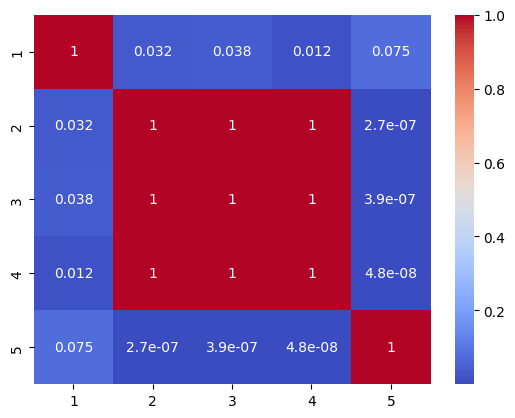

In [ ]:
dunn = sp.posthoc_dunn(tomate,val_col='SEVERIDAD 7DDA', group_col='TRAT',p_adjust='bonferroni')
sns.heatmap(dunn, annot=True, cmap='coolwarm')